In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import itertools
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 16
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

import covid19

In [3]:
data_world_path = 'time_series_19-covid-Deaths.csv'
data_world_path = covid19.data.download('deaths', repo='world')
cases_world_path = covid19.data.download('cases', repo='world')
cases_world_path

'time_series_covid19_confirmed_global.csv'

In [4]:
world_cases = covid19.data.reformat(cases_world_path)
world_data = covid19.data.reformat(data_world_path)
world_cases, world_data[world_data['country'] == 'China']

(                         location                country  deaths
 date                                                            
 2020-02-24            Afghanistan            Afghanistan       1
 2020-02-25            Afghanistan            Afghanistan       1
 2020-02-26            Afghanistan            Afghanistan       1
 2020-02-27            Afghanistan            Afghanistan       1
 2020-02-28            Afghanistan            Afghanistan       1
 ...                           ...                    ...     ...
 2020-04-07  Sao Tome and Principe  Sao Tome and Principe       4
 2020-04-08  Sao Tome and Principe  Sao Tome and Principe       4
 2020-04-09  Sao Tome and Principe  Sao Tome and Principe       4
 2020-04-10  Sao Tome and Principe  Sao Tome and Principe       4
 2020-04-10                  Yemen                  Yemen       1
 
 [10996 rows x 3 columns],
                     location country  deaths
 date                                        
 2020-02-09     China

In [5]:
print(sorted(world_data['country'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cabo Verde', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, South', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liberia', 'Libya',

In [6]:
DAY = np.timedelta64(24 * 60 * 60, 's')
PALETTE_ONE = list(sns.color_palette())

SHOWUNTIL = np.datetime64(world_data.index.max(), 's') + 10 * DAY

EXTENT = ('2020-02-15', SHOWUNTIL)
XLIM = tuple(map(np.datetime64, EXTENT))

In [7]:
PARAMS = {
    'China - Hubei': -36,
    'Iran': -2,
    'Korea, South': -1,
    'Italy': 0,
    'Spain': 5,
    'France': 11,
    'US': 13,
    'Japan': 13,
    'United Kingdom': 15,
    'Netherlands': 16,
    'Germany': 18,
    'Switzerland': 18,
    'Belgium': 20,
    'Sweden': 23,
    'Austria': 24,
}

In [8]:
country_data = {}
for country in PARAMS:
    country_data[country] = world_data[world_data['location'] == country]
    country_data[country]['daily_deaths'] = country_data[country]['deaths'].diff(1)

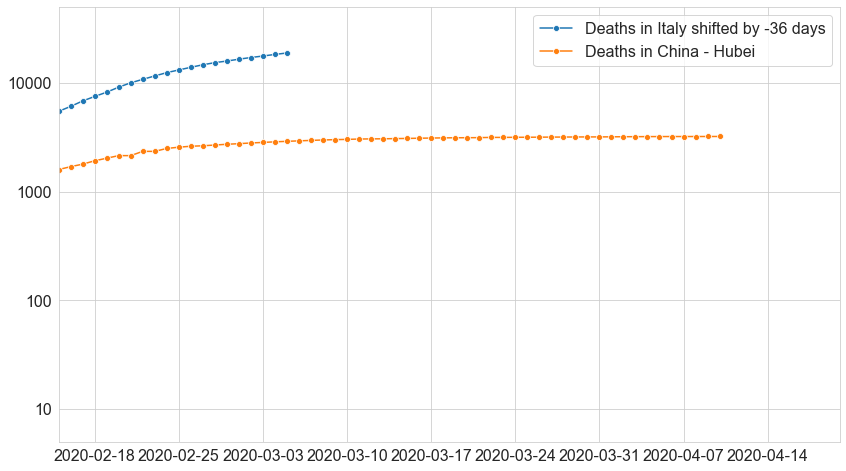

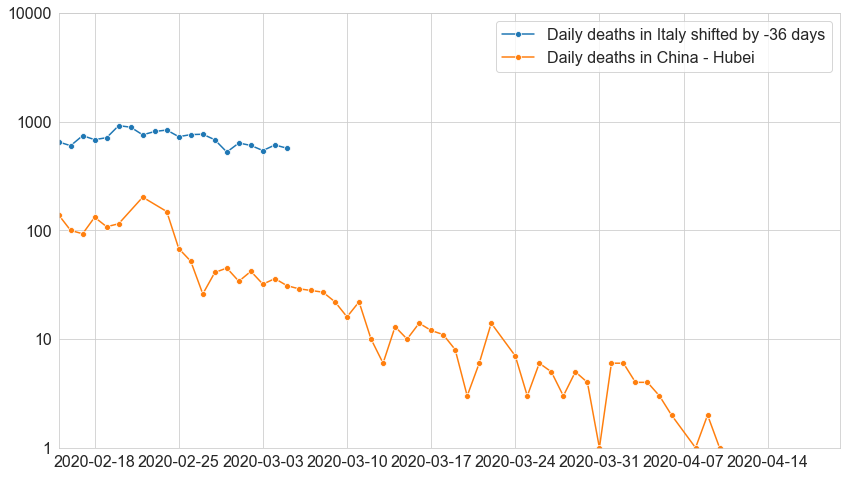

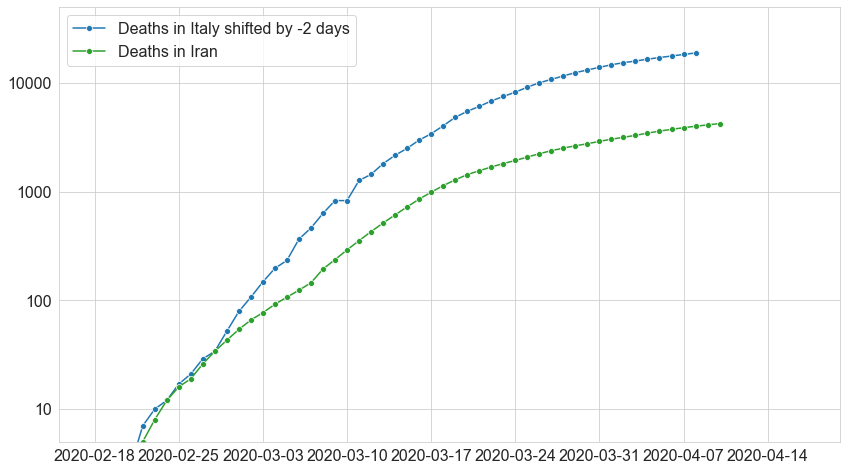

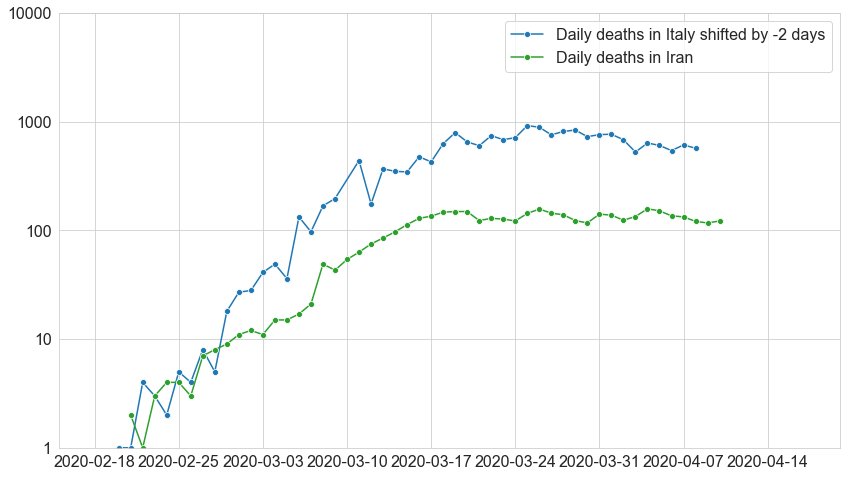

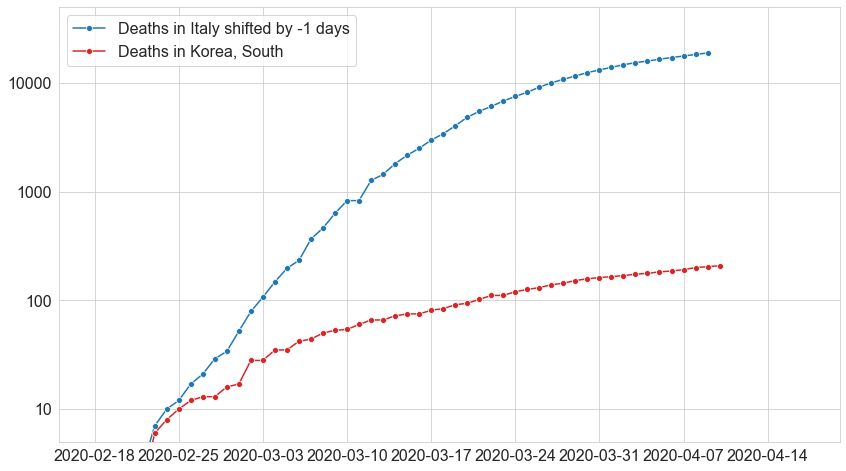

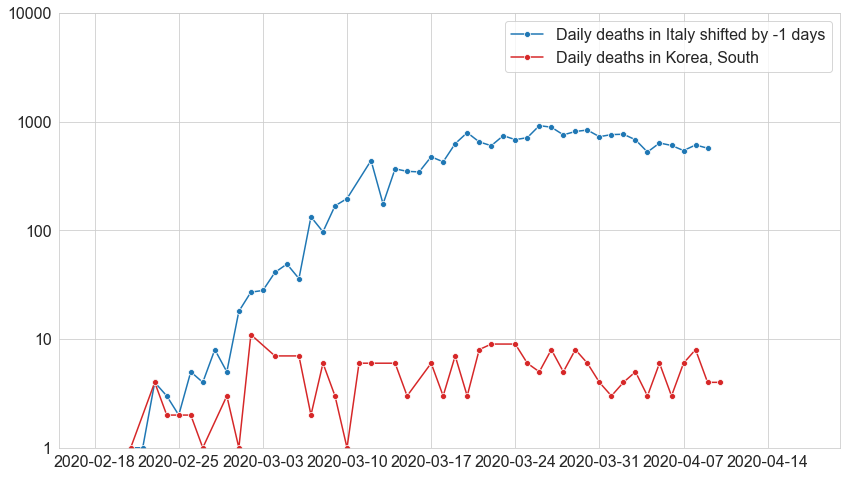

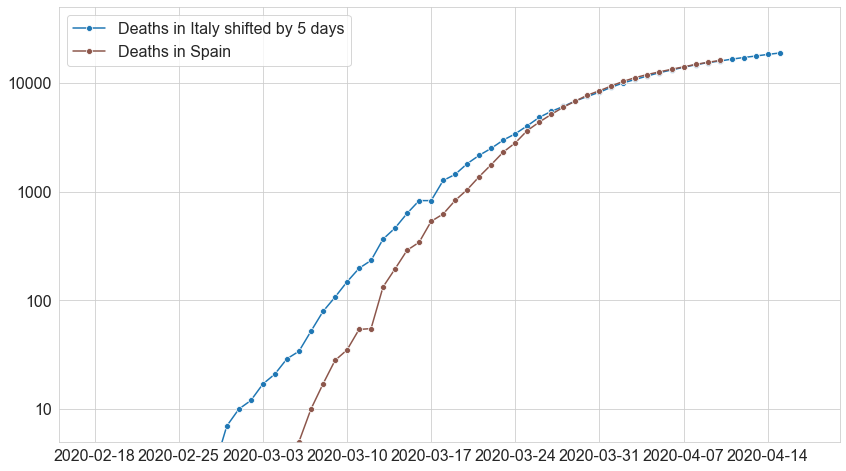

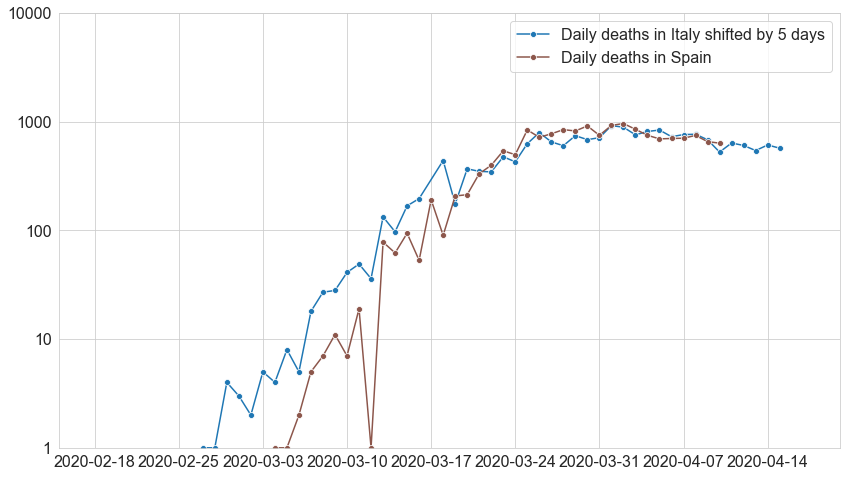

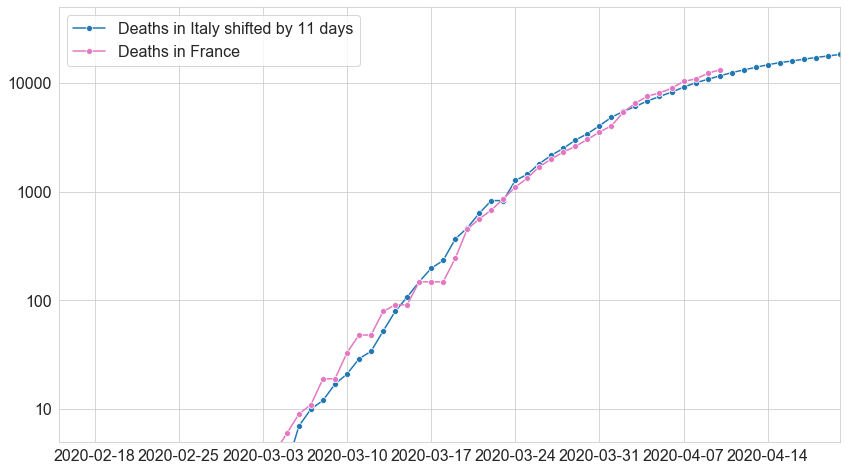

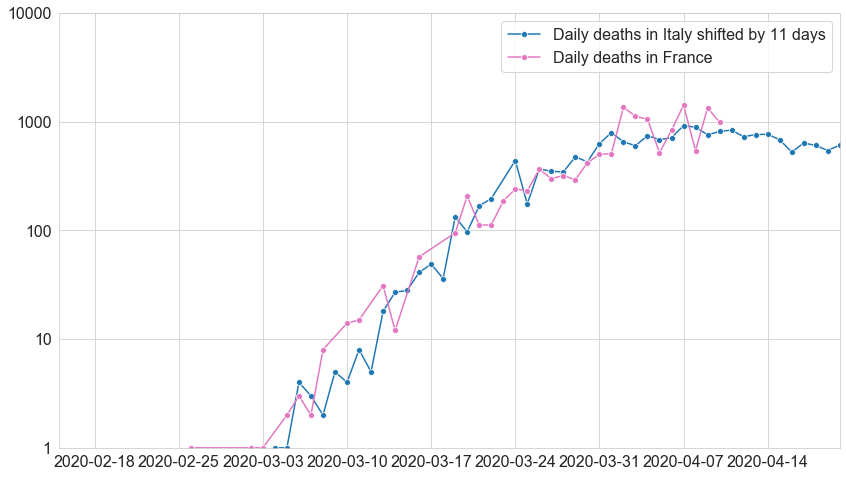

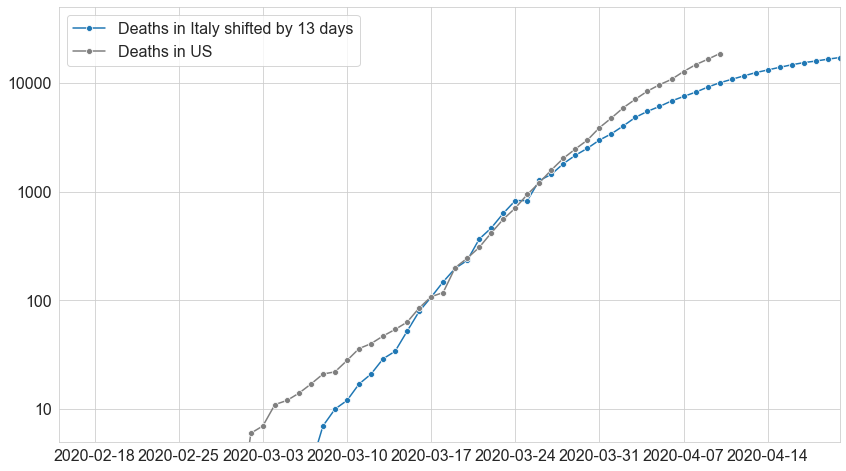

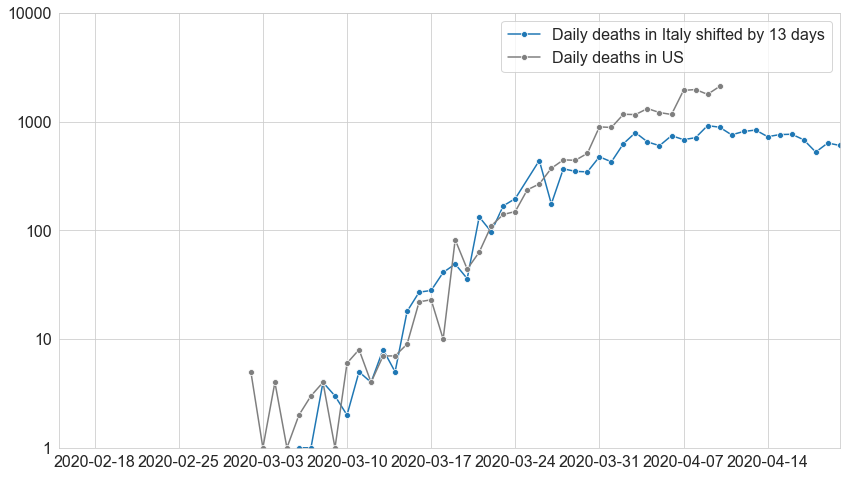

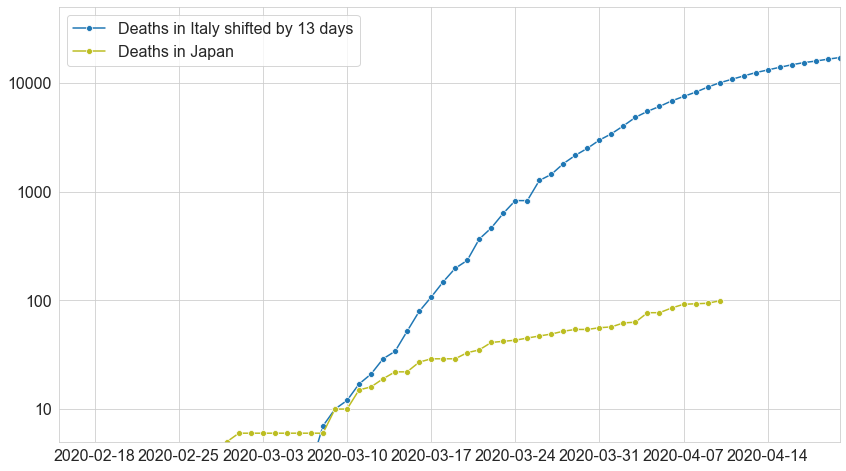

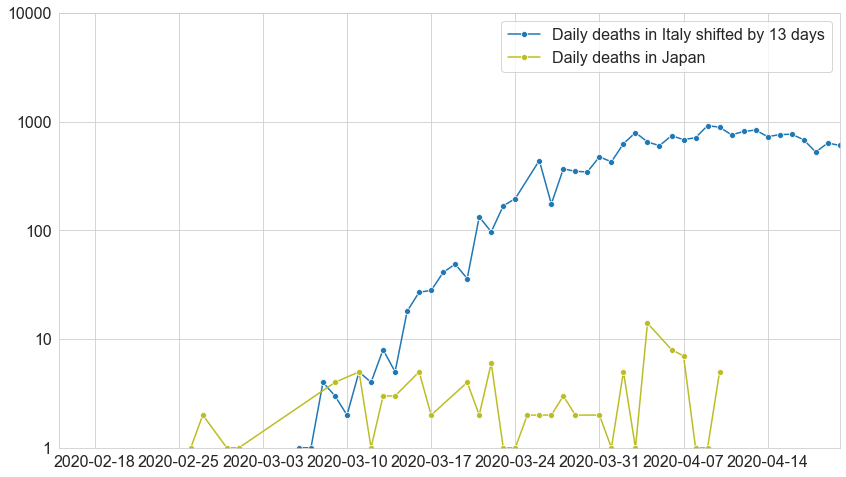

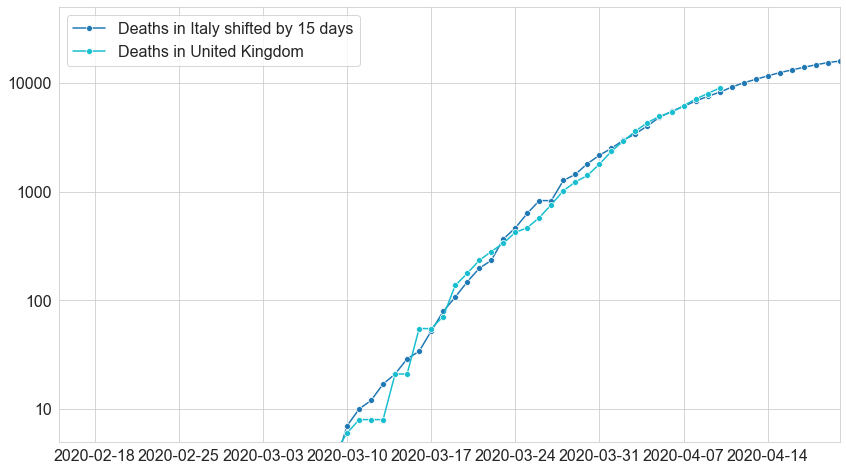

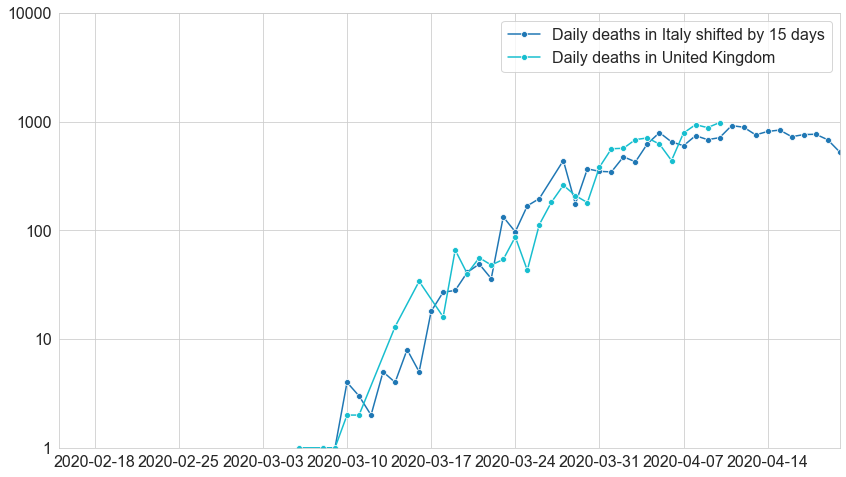

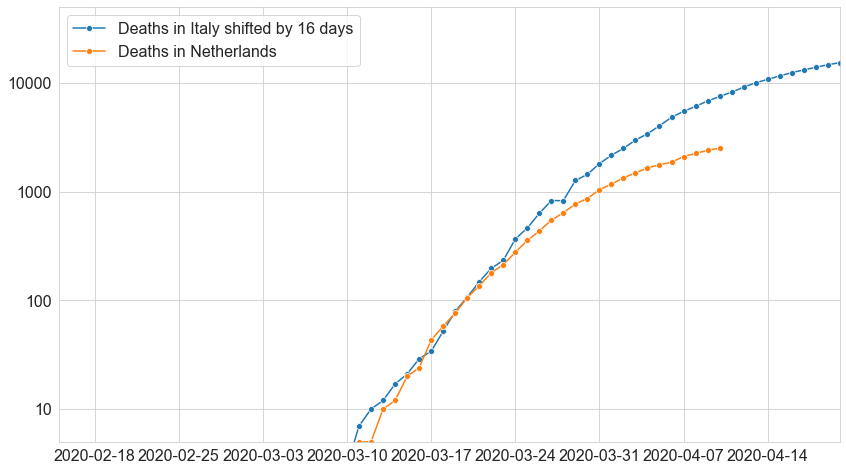

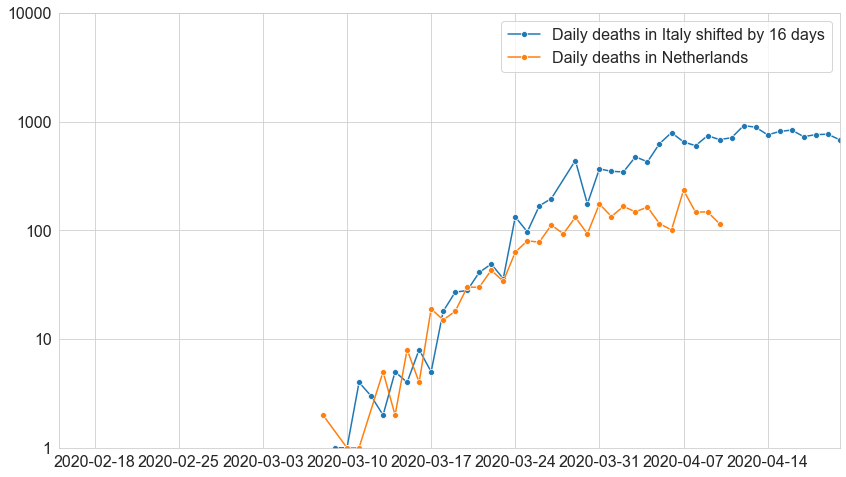

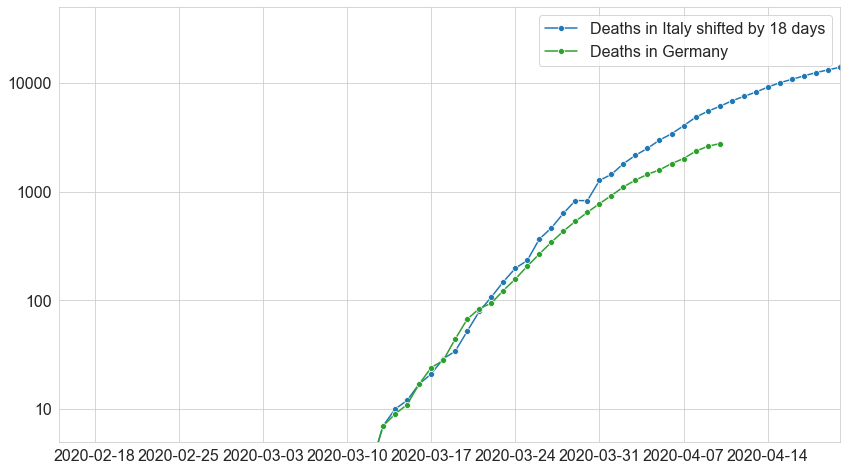

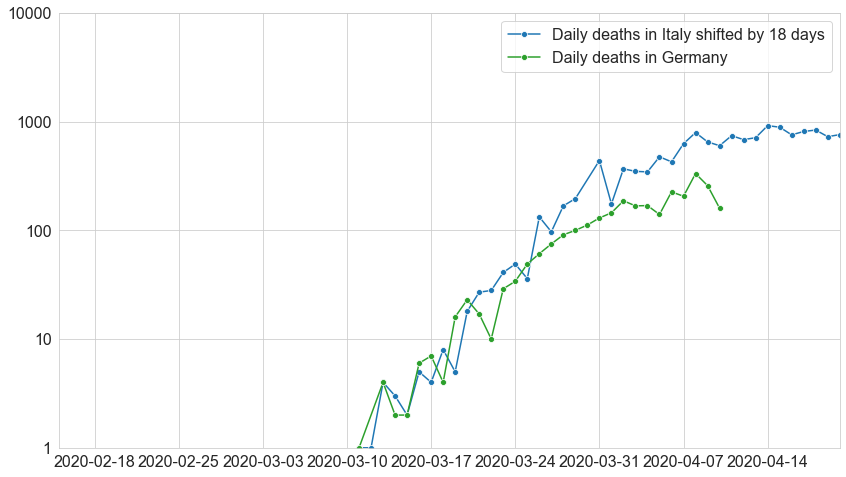

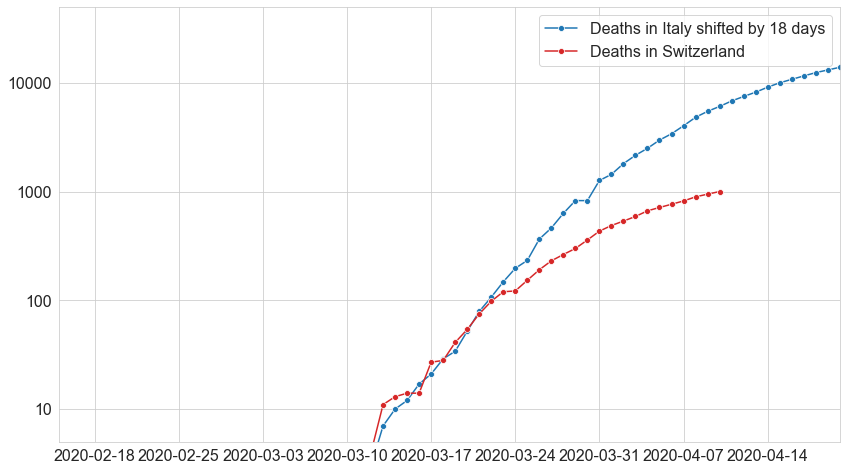

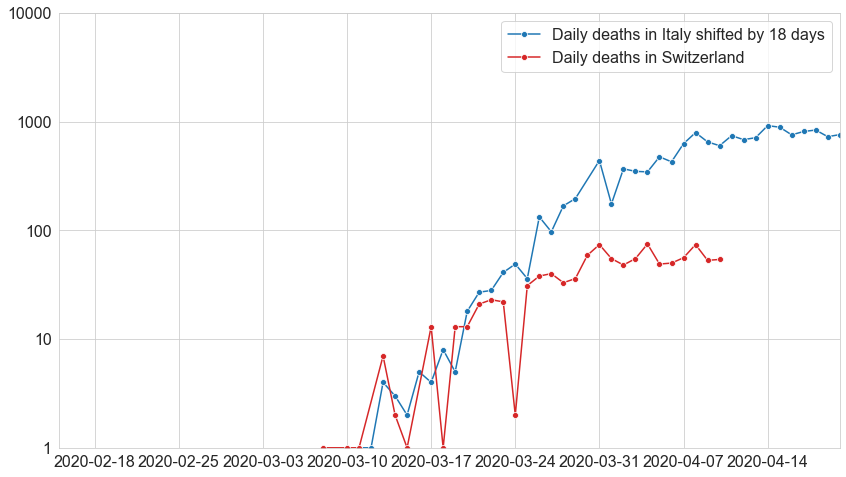

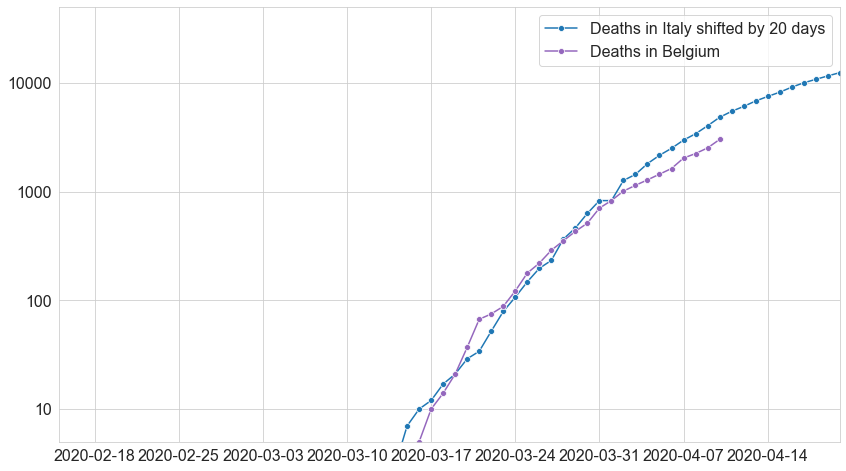

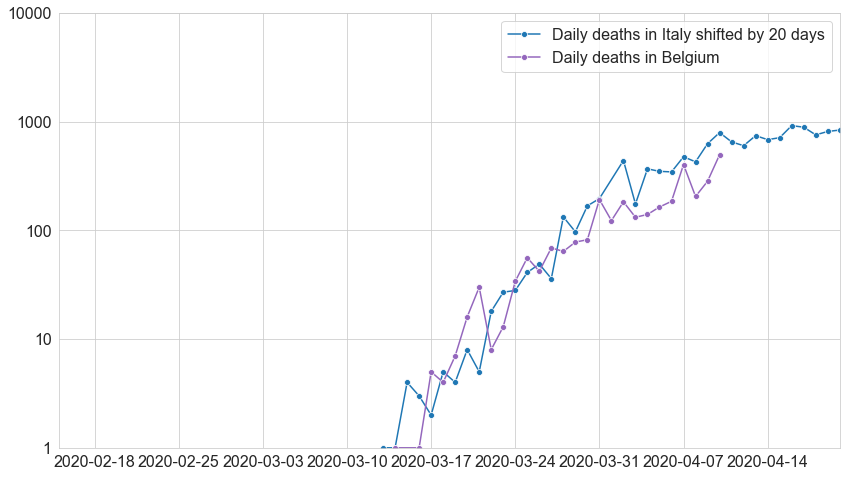

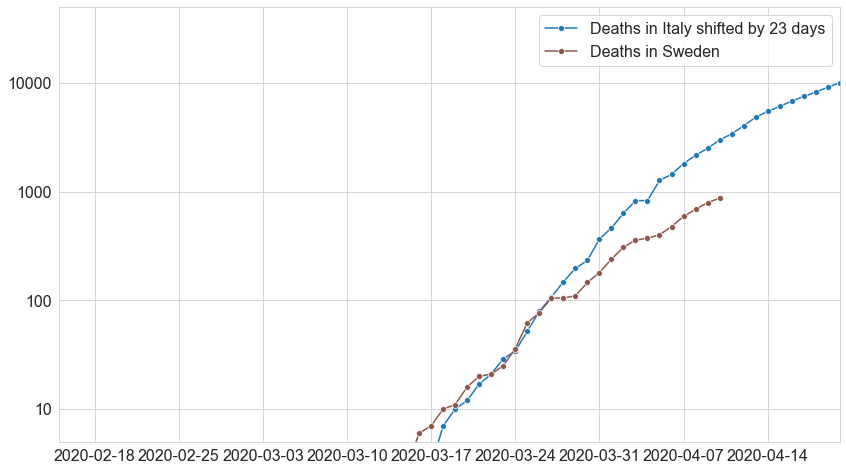

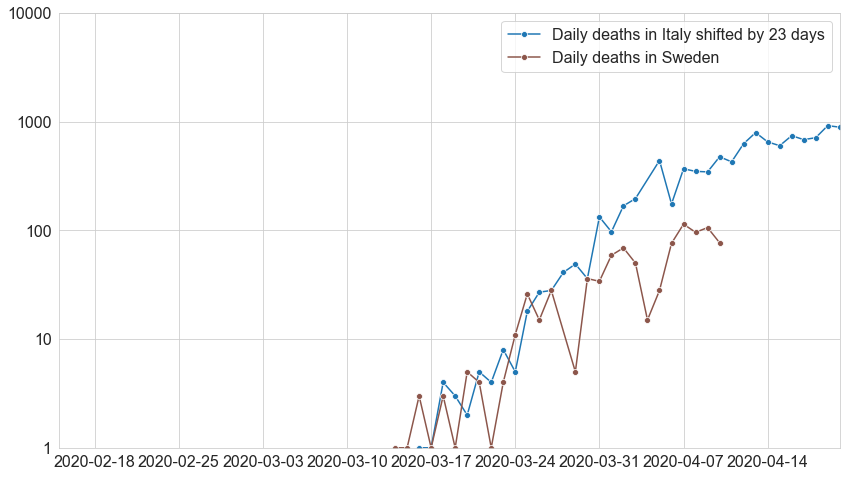

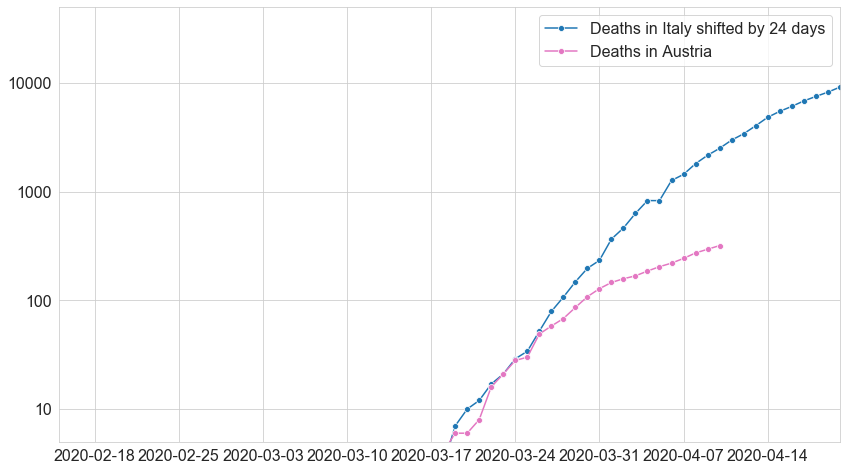

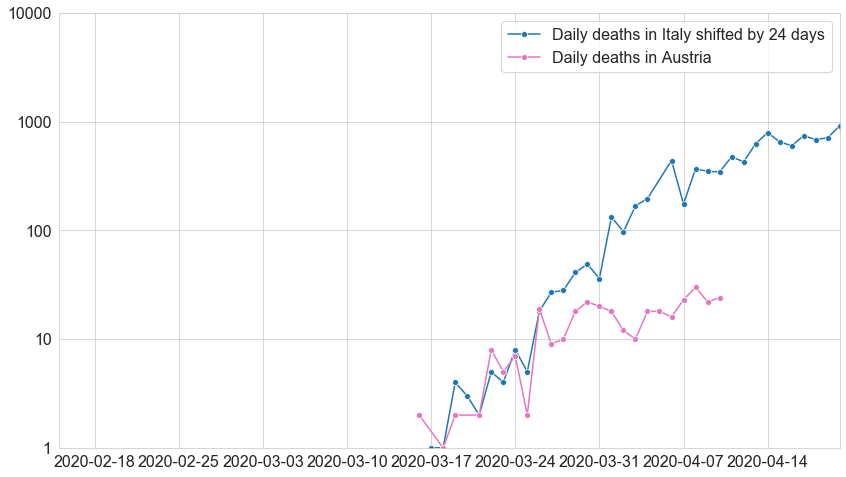

In [9]:
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[1:])):
    if country == 'Italy':
        continue
    _, ax = plt.subplots(subplot_kw={
        'yscale': 'log',
        'ylim': (5, 50000),
        # 'ylim': (0, country_data[country]['deaths'].max() * 1.1),
        'xlim': XLIM,
    }, figsize=(14, 8))
    covid19.plot.plot_data(ax, country_data['Italy']['deaths'], label=f'Deaths in Italy shifted by {delay} days', delay=-delay, color=PALETTE_ONE[0], kind='line', marker='o')
    covid19.plot.plot_data(ax, country_data[country]['deaths'], label=f'Deaths in {country}', color=color, kind='line', marker='o')
    _, ax = plt.subplots(subplot_kw={
        'yscale': 'log',
        'ylim': (1, 10000),
        # 'ylim': (0, country_data[country]['deaths'].max() * 1.1),
        'xlim': XLIM
    }, figsize=(14, 8))
    covid19.plot.plot_data(ax, country_data['Italy']['daily_deaths'], label=f'Daily deaths in Italy shifted by {delay} days', delay=-delay, color=PALETTE_ONE[0], kind='line', marker='o')
    covid19.plot.plot_data(ax, country_data[country]['daily_deaths'], label=f'Daily deaths in {country}', color=color, kind='line', marker='o')


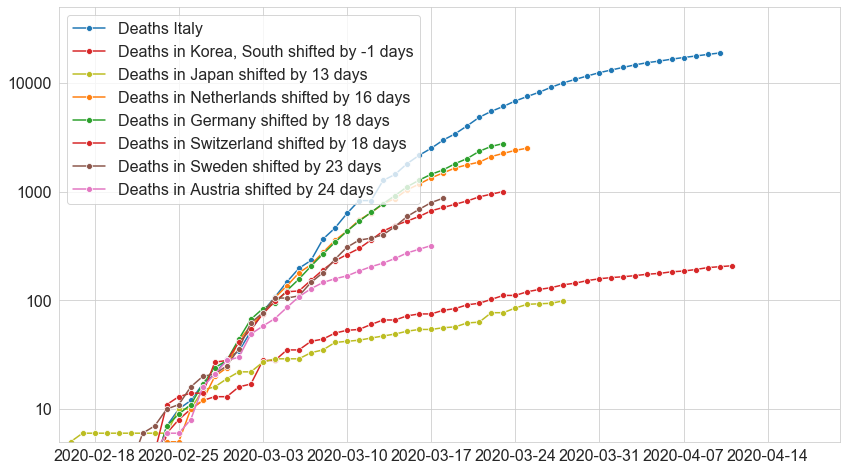

In [10]:
_, ax = plt.subplots(subplot_kw={'yscale': 'log', 'ylim': (5, 50000), 'xlim': XLIM}, figsize=(14, 8))
covid19.plot.plot_data(ax, country_data['Italy']['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0], kind='line', marker='o')
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[1:])):
    if country not in ['Germany', 'Switzerland', 'Austria', 'Netherlands', 'Korea, South', 'Japan', 'Sweden']:
        continue
    covid19.plot.plot_data(ax, country_data[country]['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=delay, color=color, kind='line', marker='o')


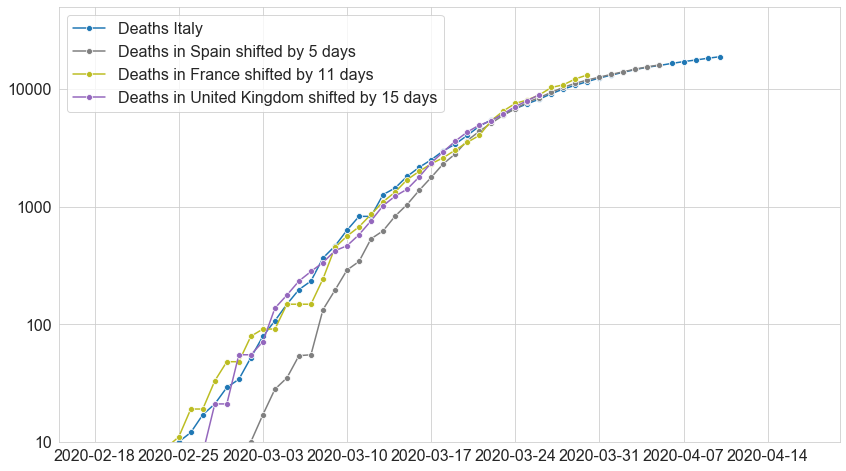

In [11]:
_, ax = plt.subplots(subplot_kw={
    'yscale': 'log',
    'ylim': (10, 50000),
    # 'ylim': (0, country_data['France']['deaths'].max() * 1.1),
    'xlim': XLIM
}, figsize=(14, 8))
covid19.plot.plot_data(ax, country_data['Italy']['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0], kind='line', marker='o')
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[3:])):
    if country not in ['France', 'United Kingdom', 'Spain']:
        continue
    covid19.plot.plot_data(ax, country_data[country]['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=delay, color=color, kind='line', marker='o')


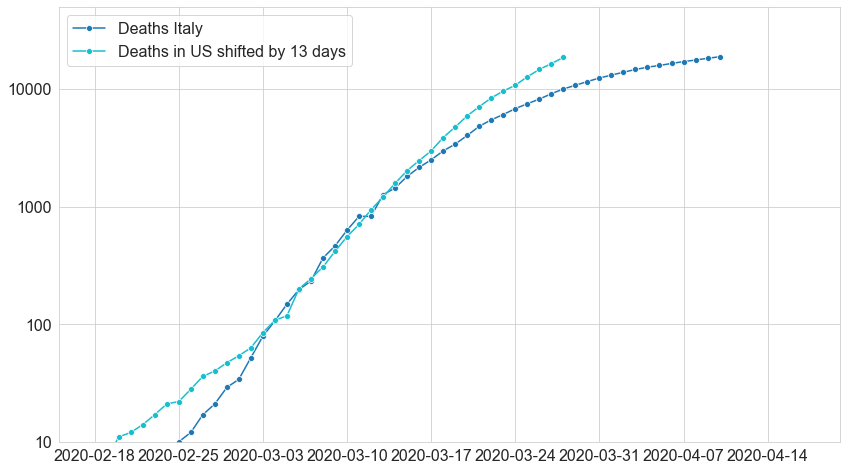

In [12]:
_, ax = plt.subplots(subplot_kw={
    'yscale': 'log',
    'ylim': (10, 50000),
    # 'ylim': (0, country_data['France']['deaths'].max() * 1.1),
    'xlim': XLIM
}, figsize=(14, 8))
covid19.plot.plot_data(ax, country_data['Italy']['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0], kind='line', marker='o')
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[3:])):
    if country not in ['US']:
        continue
    covid19.plot.plot_data(ax, country_data[country]['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=delay, color=color, kind='line', marker='o')


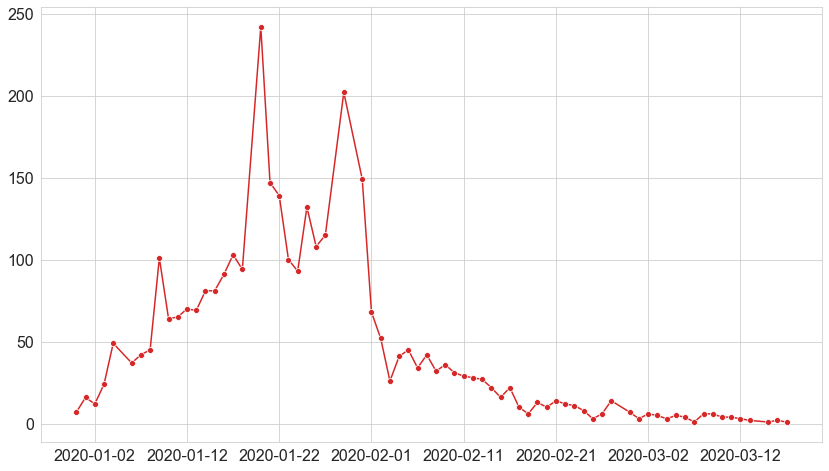

In [13]:
_, ax = plt.subplots(subplot_kw={
    # yscale': 'log',
    # 'ylim': (1, 10000),
    # 'ylim': (0, country_data['China']['daily_deaths'].max() * 1.1),
    #'xlim': XLIM
}, figsize=(14, 8))
covid19.plot.plot_data(ax, country_data['China - Hubei']['daily_deaths'], delay=delay, color=color, kind='line', marker='o', date_interval=10)


In [14]:
country_data['China - Hubei']

,location,country,deaths,daily_deaths
date,,,,
2020-01-22,China - Hubei,China,17,NaN
2020-01-23,China - Hubei,China,17,0.0
2020-01-24,China - Hubei,China,24,7.0
2020-01-25,China - Hubei,China,40,16.0
2020-01-26,China - Hubei,China,52,12.0
...,...,...,...,...
2020-04-06,China - Hubei,China,3212,2.0
2020-04-07,China - Hubei,China,3212,0.0
2020-04-08,China - Hubei,China,3213,1.0
